<a href="https://colab.research.google.com/github/edy0710/Ingenieria-de-datos-masivos/blob/main/ACT10/EjercicioSeriesTiempo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Ejercicio Series Series de Tiempo
## Curso Ingeniería de Datos Masivos
## Tec Milenio

In [1]:
# importando librerías
import pandas as pd
import numpy as np

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Análisis estadístico y series de tiempo
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX



In [14]:
# Cargar los datos
data = pd.read_csv('/content/sample_data/sales-of-shampoo.csv', names=['Month', 'Sales'], header=0)

# Mostrar las primeras filas
print(data.head())

        Month  Sales
0  2011-01-01  266.0
1  2011-02-01  145.9
2  2011-03-01  183.1
3  2011-04-01  119.3
4  2011-05-01  180.3


In [16]:
#Convirtiendo a fechas y poniendo índice de fechas
# Convertir la columna 'Month' a formato datetime
data['Month'] = pd.to_datetime(data['Month'])


print(data.head())
print("\nTipo de índice:", type(data.index))


       Month  Sales
0 2011-01-01  266.0
1 2011-02-01  145.9
2 2011-03-01  183.1
3 2011-04-01  119.3
4 2011-05-01  180.3

Tipo de índice: <class 'pandas.core.indexes.range.RangeIndex'>


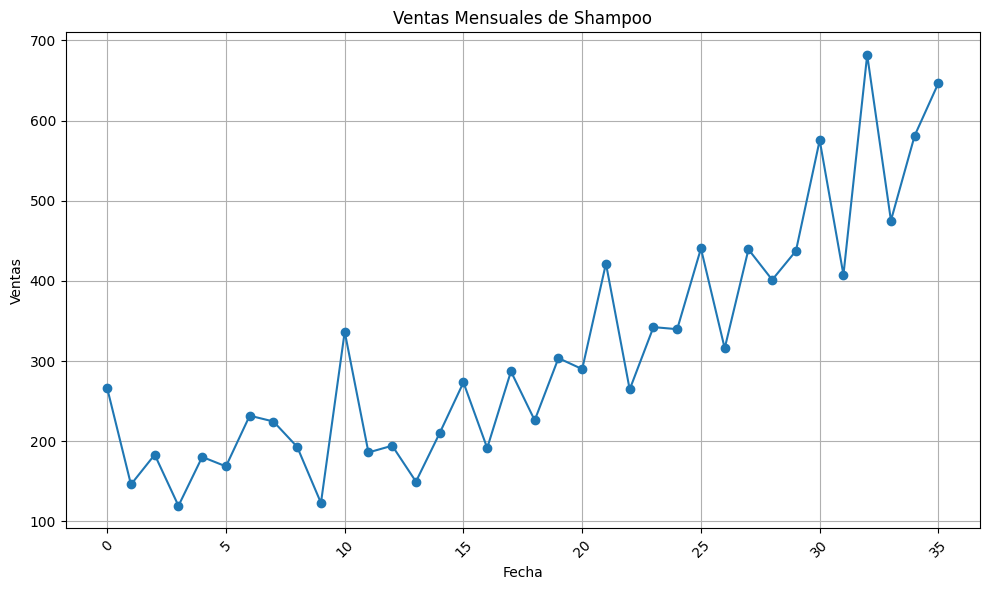

In [17]:
# describiendo datos
plt.figure(figsize=(10,6))
plt.plot(data.index, data['Sales'], marker='o')
plt.title('Ventas Mensuales de Shampoo')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [18]:
serie_tiempo = data['Sales']
serie_tiempo.head()

,Sales
0,266.0
1,145.9
2,183.1
3,119.3
4,180.3


### 1. Checar la estacionalidad de la Serie de Tiempo

Un Serie de Tiempo es estacionaria si sus propiedades estadísticas como la media, la varianza permanecen constantes en el tiempo y una autocovarianza que no depende del tiempo.

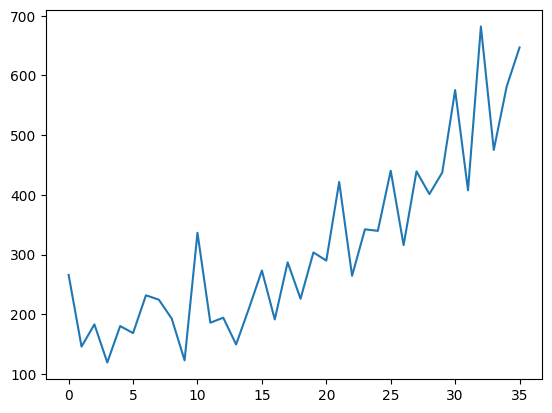

In [19]:
plt.plot(serie_tiempo)
plt.show()

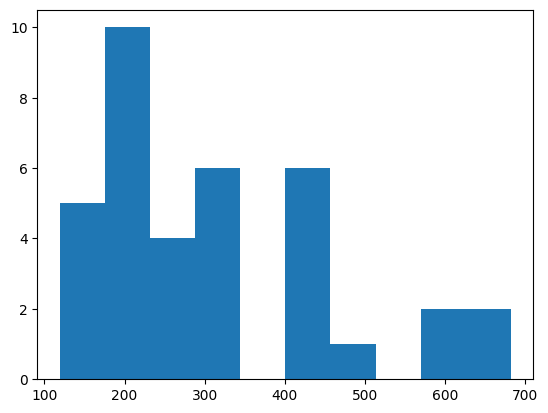

In [20]:
# Histograma de los datos
plt.hist(serie_tiempo)
plt.show()


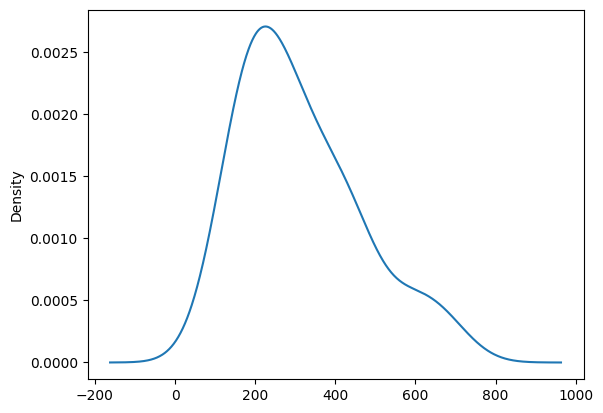

In [21]:
# Estimación de la función de distribución de probabilidad

#La densidad de probabilidad es la relación entre las observaciones y su probabilidad.

#Algunos resultados de una variable aleatoria tendrán baja densidad de probabilidad y
#otros resultados tendrán una alta densidad de probabilidad.

# Es útil conocer la función de densidad de probabilidad  de datos
# para saber si una observación dada es improbable, tan improbable como para considerarse un valor atípico o una anomalía
# y si debe eliminarse.

serie_tiempo.plot(kind = 'kde')
plt.show()

In [22]:


def test_stationarity(timeseries):

    #Determining rolling statistics
    rolmean = timeseries.rolling(window = 3).mean()
    rolstd = timeseries.rolling(window = 3).std()

    #plotting rolling statistics
    orig = plt.plot(timeseries, color = 'blue', label = 'Original')
    mean = plt.plot(rolmean, color = 'red', label = 'Rolling Mean')
    st = plt.plot(rolstd, color = 'black', label = 'Rolling Std')
    plt.legend(loc = 'best')
    plt.title('Rolling  Mean & Standard Deviation')
    plt.show()



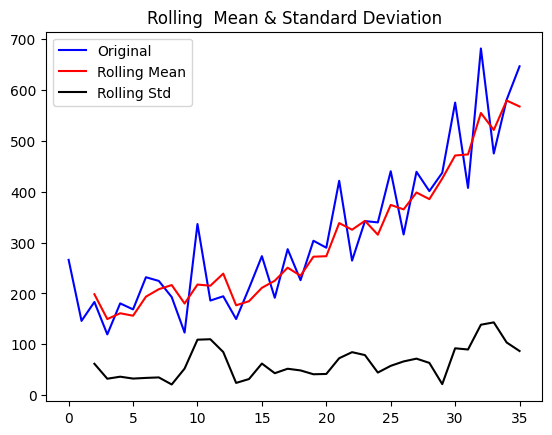

In [23]:
test_stationarity(serie_tiempo)

La desviación estándar tiene una variación muy menor, pero la media aumenta continuamente. Por lo tanto, no es una serie estacionaria.

### 2. Hacer la Serie de Tiempo Estacionaria

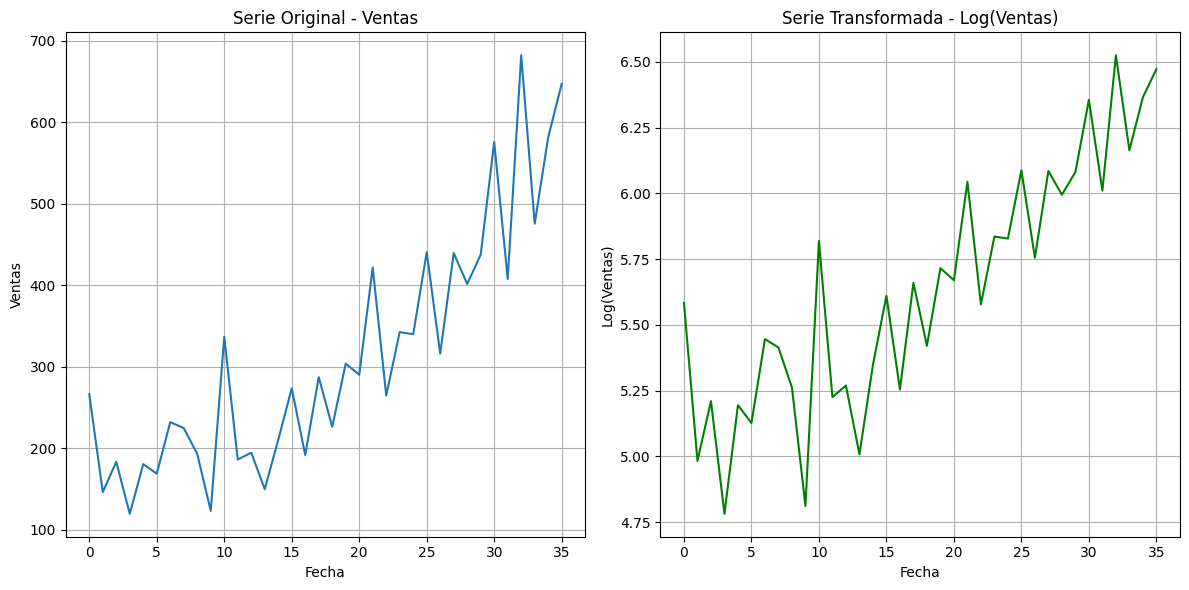

In [26]:
# Aplicar logaritmo natural
data['Sales_log'] = np.log(data['Sales'])

# Graficar ambas series
plt.figure(figsize=(12,6))

plt.subplot(1, 2, 1)
plt.plot(data.index, data['Sales'], label='Original')
plt.title('Serie Original - Ventas')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(data.index, data['Sales_log'], label='Log(Ventas)', color='green')
plt.title('Serie Transformada - Log(Ventas)')
plt.xlabel('Fecha')
plt.ylabel('Log(Ventas)')
plt.grid(True)

plt.tight_layout()
plt.show()


#### Promedios móviles


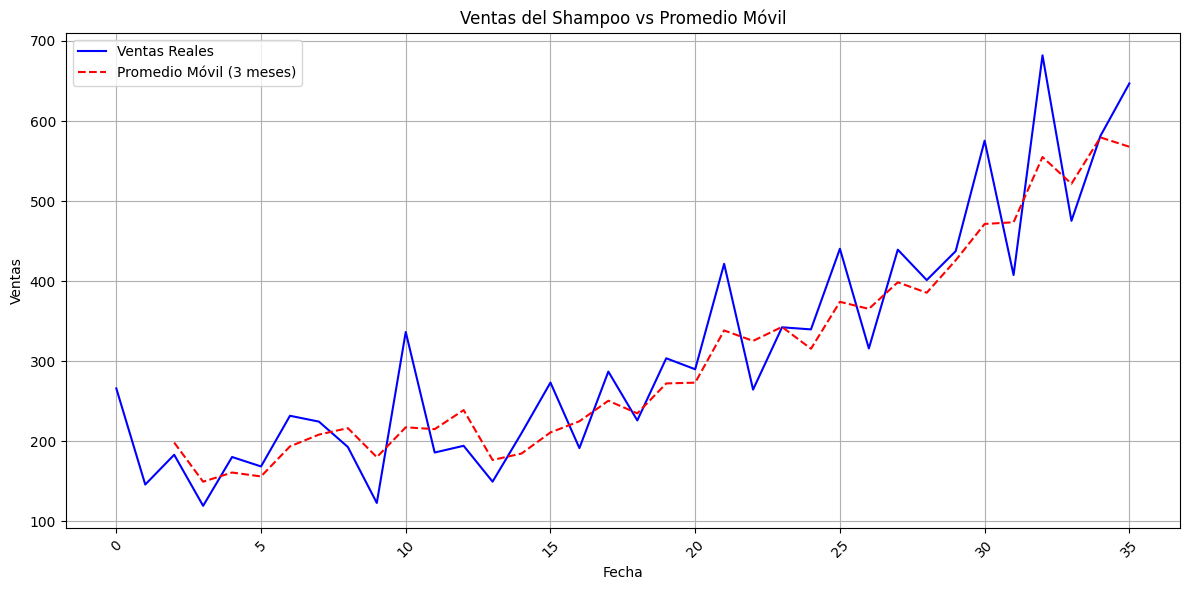

In [28]:
# Agregar columna con promedio móvil de 3 meses
data['MA_3'] = data['Sales'].rolling(window=3).mean()

plt.figure(figsize=(12,6))
plt.plot(data.index, data['Sales'], label='Ventas Reales', color='blue')
plt.plot(data.index, data['MA_3'], label='Promedio Móvil (3 meses)', color='red', linestyle='--')
plt.title('Ventas del Shampoo vs Promedio Móvil')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 3. Eliminando Tendencia y Estacionalidad

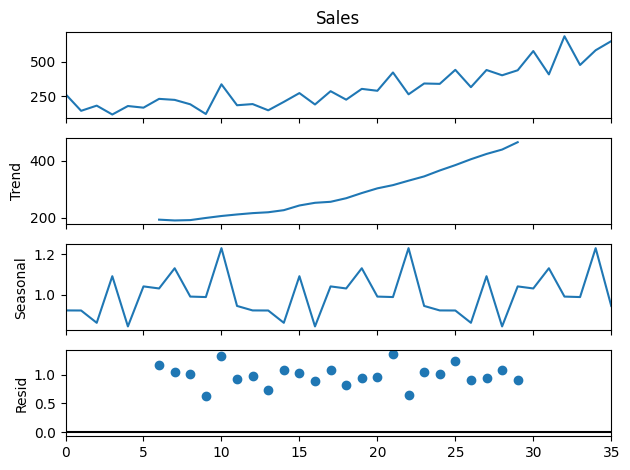

Tendencia:
0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
5           NaN
6    193.470833
7    190.633333
8    191.908333
9    199.450000
Name: trend, dtype: float64

Estacionalidad:
0    0.922913
1    0.922549
2    0.861982
3    1.091374
4    0.844236
5    1.041187
6    1.031036
7    1.130490
8    0.991044
9    0.988744
Name: seasonal, dtype: float64

Residuos:
0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
5         NaN
6    1.162048
7    1.041720
8    1.013725
9    0.623209
Name: resid, dtype: float64


In [32]:
# Agrega aqupi tu código para hacer descomposición
from statsmodels.tsa.seasonal import seasonal_decompose

# Realizar la descomposición
result = seasonal_decompose(data['Sales'], model='multiplicative', period=12)

# Graficar los componentes
result.plot()
plt.show()

# Extraer componentes
trend = result.trend
seasonal = result.seasonal
residual = result.resid

# Mostrar algunos valores
print("Tendencia:")
print(trend.head(10))

print("\nEstacionalidad:")
print(seasonal.head(10))

print("\nResiduos:")
print(residual.head(10))


### Haciendo Pronóstico con Series de Tiempo

In [ ]:
#ACF plot
#pd.plotting.autocorrelation_plot()
#plt.show()

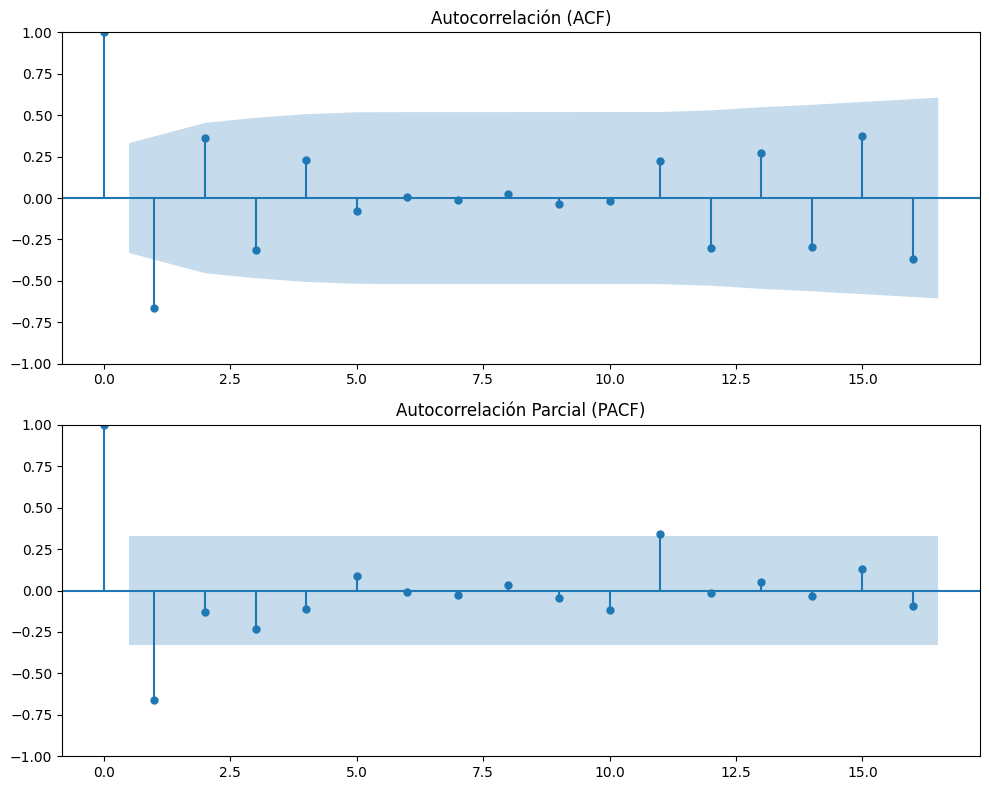

In [38]:
# Aplicar logaritmo para estabilizar varianza
serie_tiempo_log = np.log(data['Sales'])

# Diferenciar para eliminar tendencia
serie_tiempo_log_diff = serie_tiempo_log.diff().dropna()

import warnings

warnings.filterwarnings("ignore")

# Configurar gráficos
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Gráfico de Autocorrelación (ACF)
plot_acf(serie_tiempo_log_diff, ax=ax1)
ax1.set_title('Autocorrelación (ACF)')

# Gráfico de Autocorrelación Parcial (PACF)
plot_pacf(serie_tiempo_log_diff, ax=ax2)
ax2.set_title('Autocorrelación Parcial (PACF)')

plt.tight_layout()
plt.show()

In [39]:
#Another method
#ACF and PACF plots
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(serie_tiempo_log_diff, nlags=3)
lag_pacf = pacf(serie_tiempo_log_diff, nlags=3, method='ols')

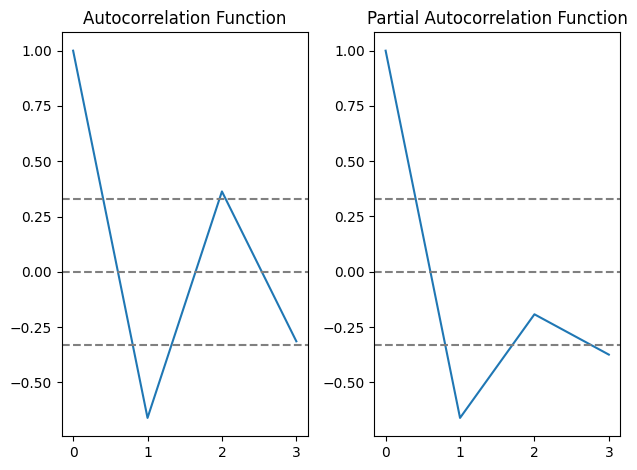

In [40]:
#Plot ACF:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y = 0, linestyle = '--', color = 'gray') #Add a horizontal line across the axis at y = 0.
plt.axhline(y = -1.96/np.sqrt(len(serie_tiempo_log_diff)), linestyle = '--', color = 'gray')
plt.axhline(y = 1.96/np.sqrt(len(serie_tiempo_log_diff)), linestyle = '--', color = 'gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y = 0, linestyle = '--', color = 'gray')
plt.axhline(y = -1.96/np.sqrt(len(serie_tiempo_log_diff)), linestyle='--', color = 'gray')
plt.axhline(y = 1.96/np.sqrt(len(serie_tiempo_log_diff)), linestyle='--', color = 'gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout() #Automatically adjust subplot parameters to give specified padding.

In [41]:
from statsmodels.tsa.arima_model import ARIMA, ARMAResults

#### AR Model

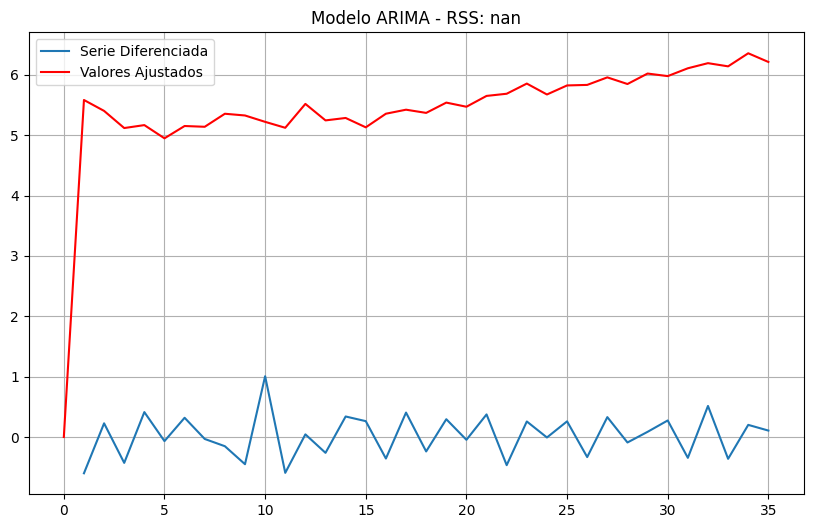

In [44]:
from statsmodels.tsa.arima.model import ARIMA
# Ajustar el modelo ARIMA
model = ARIMA(serie_tiempo_log, order=(2,1,2))  # p=2, d=1, q=2
results_AR = model.fit()

# Graficar residuos o serie diferenciada vs valores ajustados
plt.figure(figsize=(10,6))
plt.plot(serie_tiempo_log_diff, label='Serie Diferenciada')
plt.plot(results_AR.fittedvalues, color='red', label='Valores Ajustados')
plt.title('Modelo ARIMA - RSS: %.4f' % sum((results_AR.fittedvalues - serie_tiempo_log_diff)**2))
plt.legend()
plt.grid(True)
plt.show()

#### MA Model

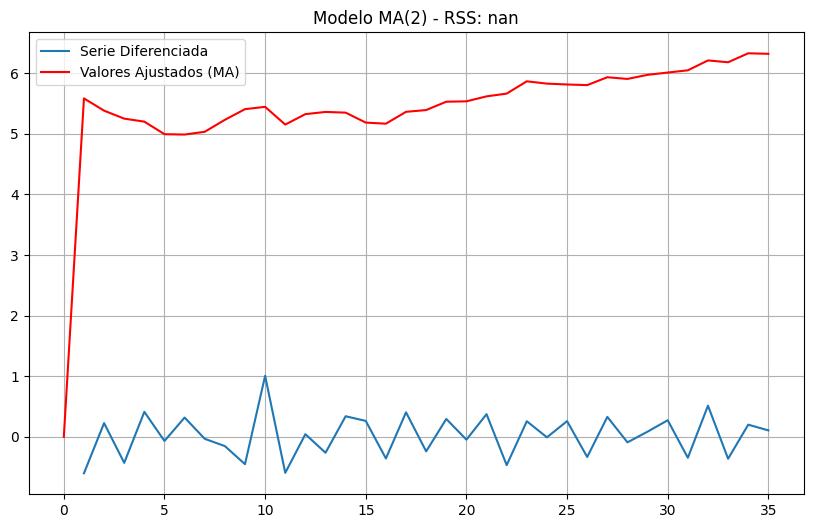

In [49]:
# Ajustar el modelo ARIMA
model = ARIMA(serie_tiempo_log, order=(0, 1, 2))  # Ejemplo: MA(2) + diferenciación
results_MA = model.fit()

# Graficar serie diferenciada vs valores ajustados
plt.figure(figsize=(10,6))
plt.plot(serie_tiempo_log_diff, label='Serie Diferenciada')
plt.plot(results_MA.fittedvalues, color='red', label='Valores Ajustados (MA)')
plt.title('Modelo MA(2) - RSS: %.4f' % sum((results_MA.fittedvalues - serie_tiempo_log_diff)**2))
plt.legend()
plt.grid(True)
plt.show()

#### Model Combinado

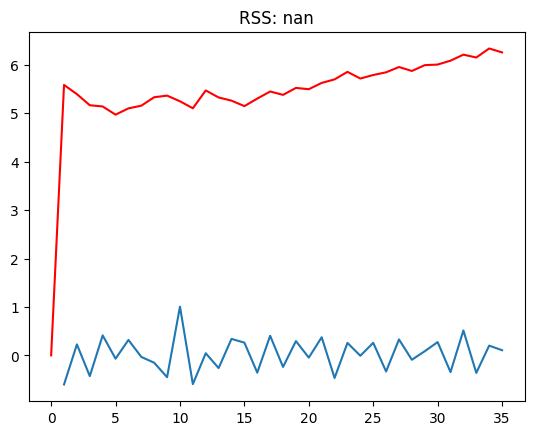

In [53]:
model = ARIMA(serie_tiempo_log, order=(1, 1, 1))
results_ARIMA = model.fit()
plt.plot(serie_tiempo_log_diff)
plt.plot(results_ARIMA.fittedvalues, color= 'red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues - serie_tiempo_log_diff)**2))
plt.show()

Los modelos AR y MA tienen casi el mismo RSS pero combinados es significativamente mejor.

#### Regresando a la Serie de Tiempo Original

In [54]:
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

p = 0
q = 0
d = 0
aic = []

#for p in range(maxp):
#    for d in range(maxd):
#        for q in range(maxq):
#            try:
#                model =ARIMA(serie_tiempo_log, order=(p,d,q))
#                model_fit=model.fit(disp=0)
#                obtener error del modelo o usar el valor de model_fit.aic
#
#            except:
#                continue
#                ignora el error e intenta otra vez





In [ ]:
### Selecciona el modelo ARIMA con los valores p, d q con menor error
### Usar modelo para hacer predicciones